In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

Seaborn 巧妙的語法和易用性,我們只用3個函數就可以創建普通的圖表。

- Catplot:用於創建分類圖
- Relplot:用於創建關係圖
- Displot:用於創建分佈圖

Plotting with categorical data: https://seaborn.pydata.org/tutorial/categorical.html

### 1.sns.catplot :用於創建分類圖

In [2]:
credit = pd.read_csv('input/plt-credit.csv')
credit.head()

,Income,Limit,Rating,Cards,Age,Education,Gender,Student,Married,Ethnicity,Balance
0,19.225,1433,122,3,38,14,Female,No,No,Caucasian,0
1,43.540,2906,232,4,69,11,Male,No,No,Caucasian,0
2,55.367,6340,448,1,33,15,Male,No,Yes,Caucasian,815
3,11.741,2271,182,4,59,12,Female,No,No,Asian,0
4,15.560,4307,352,4,57,8,Male,No,Yes,African American,579


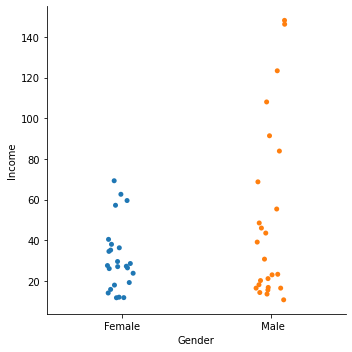

In [3]:
sns.catplot(x = 'Gender', y =  'Income', data = credit, kind = 'strip')           # strip plot defult
# sns.catplot(x = 'Gender', y =  'Income', data = credit, kind = 'bar')             # bar plot
# sns.catplot(x = 'Gender', y =  'Income', data = credit, kind = 'bar', ci  =False) # Confidence interval (信賴區間)
# sns.catplot(x = 'Ethnicity',y ='Income', data = credit, kind = 'bar', hue = 'Gender')
# sns.catplot(x = 'Gender', y =  'Income', data = credit, kind = 'box')
# sns.catplot(x = 'Gender', y =  'Income', data = credit, kind = 'box',height=6, aspect=1.8, width=0.5)

### 2.sns.regplot() :用於創建關係圖

In [4]:
boston = pd.read_csv('input/plt-boston.csv')
boston.head()

,crim,nox,rm,age,tax,medv
0,0.00632,0.538,6.575,65.2,296,24.0
1,0.02731,0.469,6.421,78.9,242,21.6
2,0.02729,0.469,7.185,61.1,242,34.7
3,0.03237,0.458,6.998,45.8,222,33.4
4,0.06905,0.458,7.147,54.2,222,36.2


<AxesSubplot:xlabel='medv', ylabel='crim'>

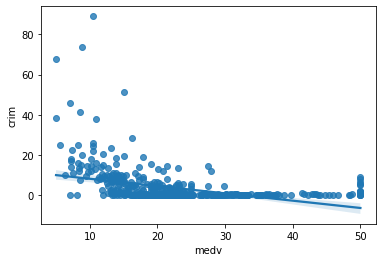

In [5]:
sns.regplot(x= 'medv', y= 'crim', data = boston)                              # defult kind = scatter
# sns.regplot(x= 'medv', y= 'crim', data = boston, ci = False)
# sns.regplot(x= 'medv', y= 'crim', data = boston, ci = False, fit_reg = False) #remove thre regression line
# sns.relplot(x= 'medv', y= 'crim', data = boston, kind='scatter')

### 3.sns.displot() :用於創建分佈圖

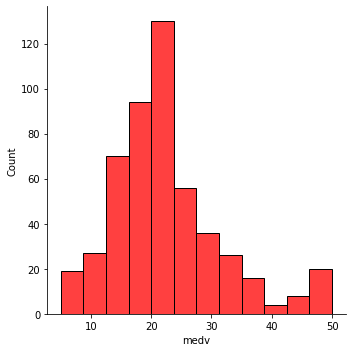

In [6]:
sns.displot(boston['medv'], bins=12, color='r')
# sns.displot(boston['medv'], kind = 'kde', color='b')

## Main Section

## 01-Line, Area

In [7]:
data = px.data.gapminder()
data.head()

,country,continent,year,lifeExp,pop,gdpPercap,iso_alpha,iso_num
0,Afghanistan,Asia,1952,28.801,8425333,779.445314,AFG,4
1,Afghanistan,Asia,1957,30.332,9240934,820.853030,AFG,4
2,Afghanistan,Asia,1962,31.997,10267083,853.100710,AFG,4
3,Afghanistan,Asia,1967,34.020,11537966,836.197138,AFG,4
4,Afghanistan,Asia,1972,36.088,13079460,739.981106,AFG,4


/Users/jerrychien/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='year', ylabel='lifeExp'>

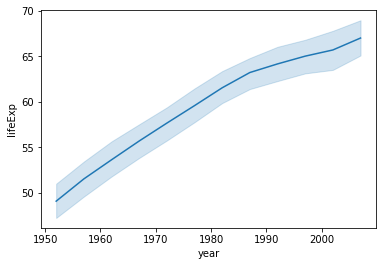

In [8]:
sns.lineplot(data['year'], data['lifeExp'])

In [9]:
data = pd.read_csv("https://milliams.com/courses/data_analysis_python/titanic.csv")
data.head()

,name,gender,age,class,embarked,country,ticketno,fare,sibsp,parch,survived
0,"Abbing, Mr. Anthony",male,42.0,3rd,S,United States,5547.0,7.11,0.0,0.0,no
1,"Abbott, Mr. Eugene Joseph",male,13.0,3rd,S,United States,2673.0,20.05,0.0,2.0,no
2,"Abbott, Mr. Rossmore Edward",male,16.0,3rd,S,United States,2673.0,20.05,1.0,1.0,no
3,"Abbott, Mrs. Rhoda Mary 'Rosa'",female,39.0,3rd,S,England,2673.0,20.05,1.0,1.0,yes
4,"Abelseth, Miss. Karen Marie",female,16.0,3rd,S,Norway,348125.0,7.13,0.0,0.0,yes


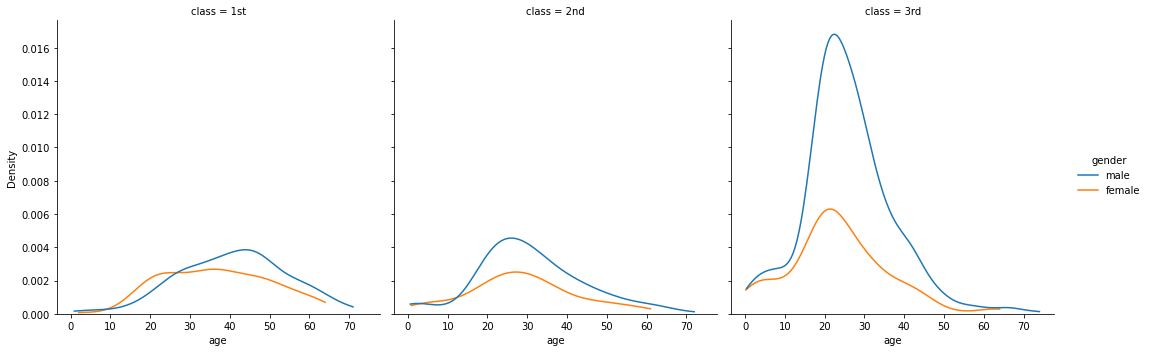

In [10]:
passengers = data[(data["class"] == "1st") | (data["class"] == "2nd") | (data["class"] == "3rd")]
passengers = data[data["class"].isin(["1st", "2nd", "3rd"])]
passengers.head()

#sns.displot(data=passengers,x="age",hue="gender",kind="kde",cut=0)
sns.displot(data=passengers,x="age",hue="gender",kind="kde",cut=0,col="class",col_order=["1st", "2nd", "3rd"])

/Users/jerrychien/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/jerrychien/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


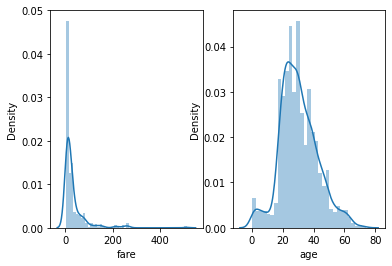

In [11]:
plt.subplot(1, 2, 1)
sns.distplot(data['fare'])
plt.subplot(1, 2, 2)
sns.distplot(data['age'])
plt.show()

In [12]:
data = pd.read_csv('input/plt-employee.csv')
data.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


/Users/jerrychien/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='AvgTimeSpanAtCompanies', ylabel='Density'>

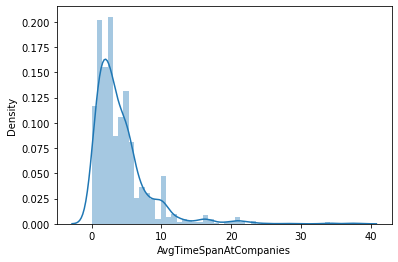

In [13]:
data['AvgTimeSpanAtCompanies'] = (data['TotalWorkingYears'])/(data['NumCompaniesWorked'] + 1)
sns.distplot(data['AvgTimeSpanAtCompanies'])

/Users/jerrychien/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='OverallSatisfaction', ylabel='Density'>

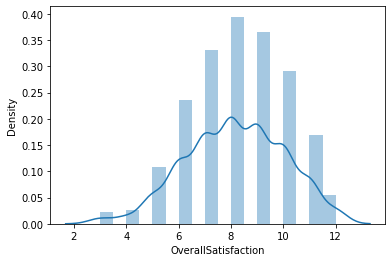

In [14]:
data['OverallSatisfaction'] = (data['EnvironmentSatisfaction'] + data['RelationshipSatisfaction'] + data['JobSatisfaction'])
sns.distplot(data['OverallSatisfaction'])

## 02-Scatter, strip

In [15]:
data = px.data.iris()
data.head()

,sepal_length,sepal_width,petal_length,petal_width,species,species_id
0,5.1,3.5,1.4,0.2,setosa,1
1,4.9,3.0,1.4,0.2,setosa,1
2,4.7,3.2,1.3,0.2,setosa,1
3,4.6,3.1,1.5,0.2,setosa,1
4,5.0,3.6,1.4,0.2,setosa,1


/Users/jerrychien/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='sepal_width', ylabel='sepal_length'>

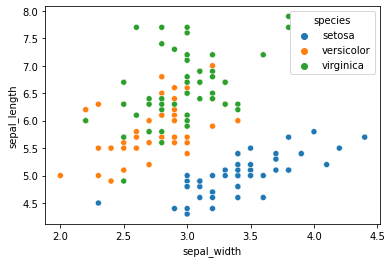

In [16]:
sns.scatterplot(data['sepal_width'], data['sepal_length'], hue = data['species'])

In [17]:
tips = pd.read_csv("https://milliams.com/courses/data_analysis_python/tips.csv")
tips["percent_tip"] = (tips["tip"] / tips["total_bill"])*100
tips.head()

,total_bill,tip,day,time,size,percent_tip
0,16.99,0.71,Sun,Dinner,2,4.178929
1,10.34,1.16,Sun,Dinner,3,11.218569
2,21.01,2.45,Sun,Dinner,3,11.661114
3,23.68,2.32,Sun,Dinner,2,9.797297
4,24.59,2.53,Sun,Dinner,4,10.288735


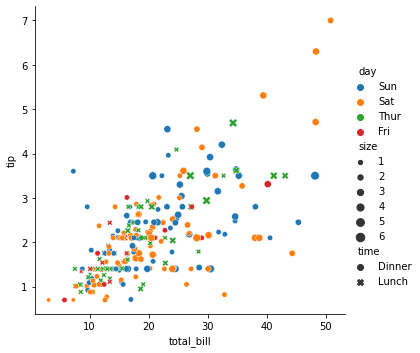

In [18]:
#sns.relplot(data=tips, x="total_bill", y="tip")  #plot 
#sns.relplot(data=tips, x="total_bill", y="tip", hue="day", style="day")
sns.relplot(data=tips, x="total_bill", y="tip", hue="day", style="time", size="size")  # color plot

## 03-Bar Histograms

In [19]:
tips = pd.read_csv("https://milliams.com/courses/data_analysis_python/tips.csv")
tips["percent_tip"] = (tips["tip"] / tips["total_bill"])*100
tips.head()

,total_bill,tip,day,time,size,percent_tip
0,16.99,0.71,Sun,Dinner,2,4.178929
1,10.34,1.16,Sun,Dinner,3,11.218569
2,21.01,2.45,Sun,Dinner,3,11.661114
3,23.68,2.32,Sun,Dinner,2,9.797297
4,24.59,2.53,Sun,Dinner,4,10.288735


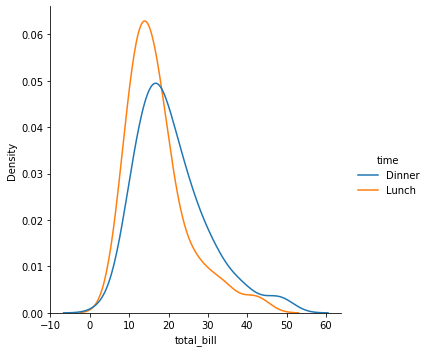

In [20]:
#sns.displot(data=tips, x="total_bill")  # 直方
#sns.displot(data=tips, x="total_bill", col="time")  #時間分離
#sns.displot(data=tips, x="total_bill", hue="time", stat="density", common_norm=False)  # hue 時間區分直方疊圖
sns.displot(data=tips, x="total_bill",  hue="time", kind="kde", common_norm=False)      # hue 時間區分線性疊圖

In [21]:
frame = pd.read_csv('input/pd-yearsale.csv' )
frame.head()

,year,quarters,sale1,sale2,sale3
0,2010,A,200,258,592
1,2010,B,328,664,606
2,2010,C,870,249,918
3,2010,D,209,971,629
4,2011,A,348,863,929


<AxesSubplot:>

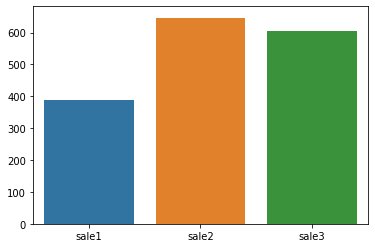

In [22]:
# sns.barplot(data = frame)
# sns.barplot(data = frame[['sale1','sale2','sale3']])
sns.barplot(data = frame[['sale1','sale2','sale3']], ci = False) #To remove confidence interval

<AxesSubplot:xlabel='year', ylabel='sale1'>

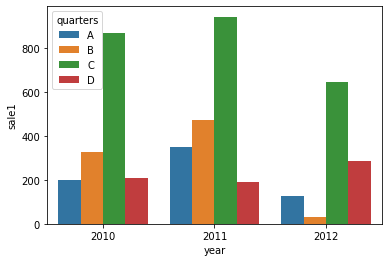

In [23]:
# sns.barplot(x= frame.year, y = frame.sale1, ci = False)
# sns.barplot(x= frame['year'], y = frame['sale1'], ci = False)
# sns.barplot(x =frame['year'], y = frame['sale1'], ci= False, orient = 'h')
sns.barplot(x= frame['year'], y = frame['sale1'], hue = frame['quarters'])

## 04-Box Plots, violin

In [24]:
tips = pd.read_csv("https://milliams.com/courses/data_analysis_python/tips.csv")
tips["percent_tip"] = (tips["tip"] / tips["total_bill"])*100
tips.head()

,total_bill,tip,day,time,size,percent_tip
0,16.99,0.71,Sun,Dinner,2,4.178929
1,10.34,1.16,Sun,Dinner,3,11.218569
2,21.01,2.45,Sun,Dinner,3,11.661114
3,23.68,2.32,Sun,Dinner,2,9.797297
4,24.59,2.53,Sun,Dinner,4,10.288735


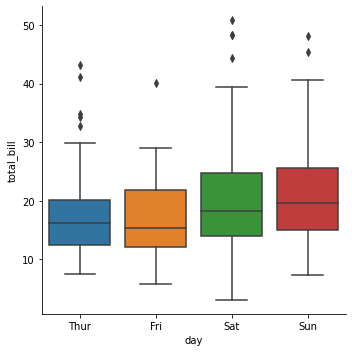

In [25]:
#sns.catplot(data=tips, x="day", y="total_bill")  #散佈圖
#sns.catplot(data=tips, x="day", y="total_bill", order=["Thur", "Fri", "Sat", "Sun"])  #排序
sns.catplot(data=tips, x="day", y="total_bill", order=["Thur", "Fri", "Sat", "Sun"], kind="box") #廂型圖

In [26]:
tips = sns.load_dataset("tips")
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


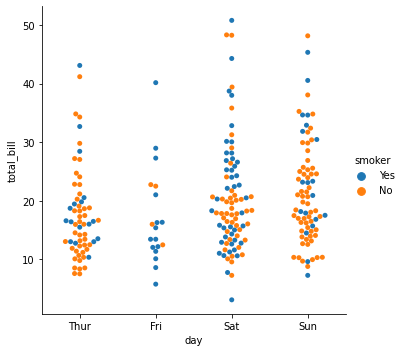

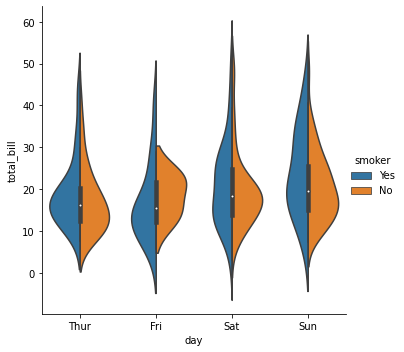

In [27]:
sns.catplot(x="day", y="total_bill", hue="smoker",kind="swarm", data=tips);
sns.catplot(x="day", y="total_bill", hue="smoker",kind="violin", data=tips, split=True);

## Custom

In [28]:
tips = sns.load_dataset("tips")
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


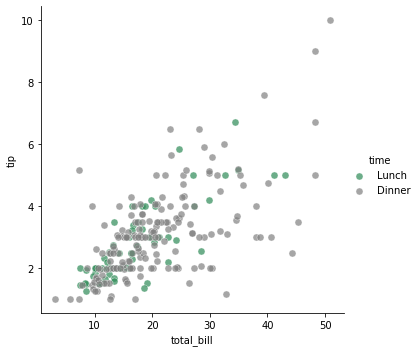

In [29]:
pal = dict(Lunch="seagreen",Dinner="gray")
g = sns.FacetGrid(tips, hue="time",palette=pal,height=5)
g.map(plt.scatter,"total_bill","tip",s=50,alpha=.7,linewidth=.5,edgecolor="white")      
g.add_legend()
plt.show()

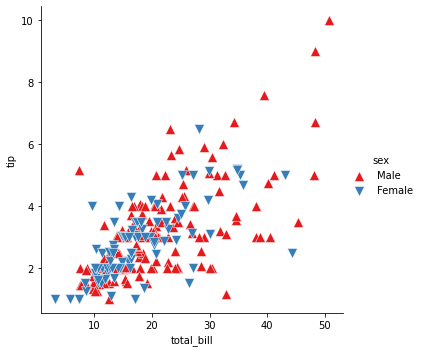

In [30]:
g = sns.FacetGrid(tips, hue="sex",palette="Set1",height=5,hue_kws={"marker":["^","v"]})
g.map(plt.scatter,"total_bill","tip",s=100,linewidth=.5,edgecolor="white")      
g.add_legend()
plt.show()

## Histograms and Density Plots

In [31]:
import pandas as pd
import seaborn as sns

frame = pd.read_csv('input/pd-seaborn.csv')
frame.head()

,age,wage
0,39.0,48.0
1,28.0,44.0
2,28.0,49.0
3,36.0,56.0
4,30.0,24.0


<AxesSubplot:ylabel='Frequency'>

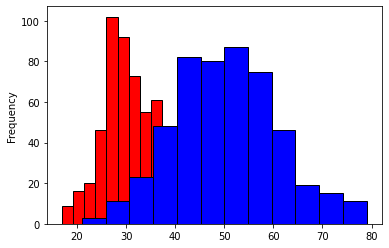

In [32]:
#frame['age'].plot.hist(bins = 12)
frame['age'].plot.hist(bins = 12, color = 'red', edgecolor = 'black', linewidth = 1)
frame['wage'].plot.hist(bins = 12, color = 'blue', edgecolor = 'black', linewidth = 1)

To create a density plot, we use the function **plot.density()**:

<AxesSubplot:ylabel='Density'>

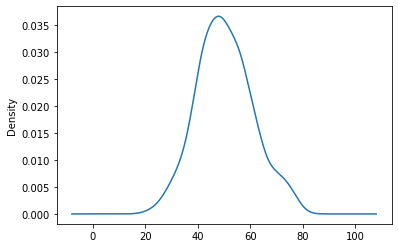

In [33]:
frame['wage'].plot.density()

In [34]:
# sns.boxplot(x=df2["class"], y=df2["Petal Width"])  #盒狀圖
# sns.violinplot(x=df2["Petal Length"], y=df2["Petal Width"]) # 提琴圖
# sns.regplot(x=df2["Petal Length"], y=df2["Petal Width"],ci=10) # 分佈圖

In [35]:
# data.describe().style.background_gradient(cmap = 'Greens')
# data.isnull().sum()

## Example

In [36]:
# Ploting with x and y
import numpy as np
import pandas as pd
rng = np.random.RandomState(0)
x = np.linspace(0, 10, 500)
y = np.cumsum(rng.rand(500, 6),0)

In [37]:
data = np.random.multivariate_normal([0,0], [[5,2],[2,2]], size=2000)
data = pd.DataFrame(data, columns=['x', 'y'])

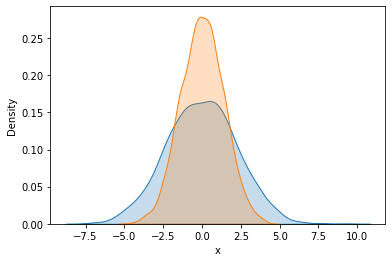

In [38]:

# For KD Plot with normal distrubution 

for col in 'xy':
    sns.kdeplot(data[col], shade=True)

/Users/jerrychien/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/jerrychien/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='y', ylabel='Density'>

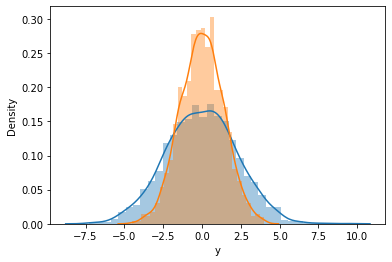

In [39]:
sns.distplot(data['x'])
sns.distplot(data['y'])

/Users/jerrychien/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y, data. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


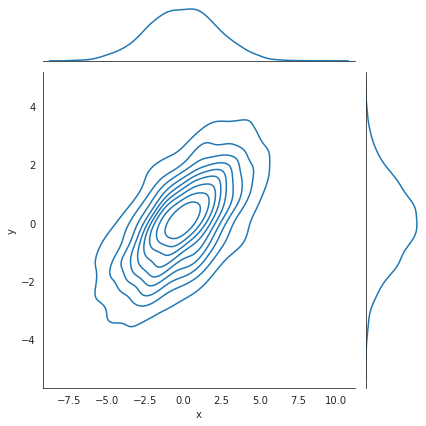

In [40]:
with sns.axes_style('white'):
    sns.jointplot("x", "y", data, kind="kde")


In [41]:
# We can also plot a joint plot using seaborn

/Users/jerrychien/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y, data. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


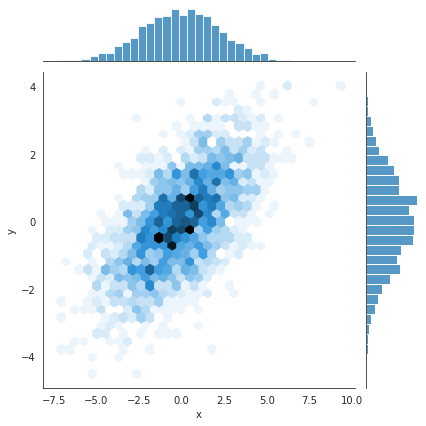

In [42]:
with sns.axes_style('white'):
    sns.jointplot("x", "y", data, kind="hex")

In [43]:
tips = sns.load_dataset('tips')
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


/Users/jerrychien/opt/anaconda3/lib/python3.9/site-packages/seaborn/categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/Users/jerrychien/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y, hue. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


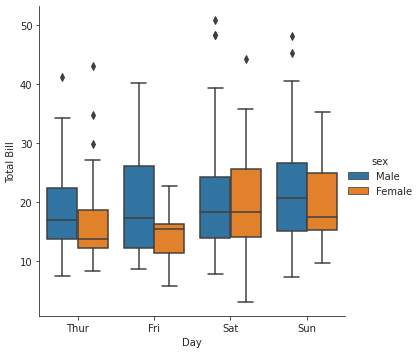

In [44]:
with sns.axes_style(style='ticks'):
    g = sns.factorplot("day", "total_bill", "sex", data=tips,kind="box")
    g.set_axis_labels("Day","Total Bill");

/Users/jerrychien/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


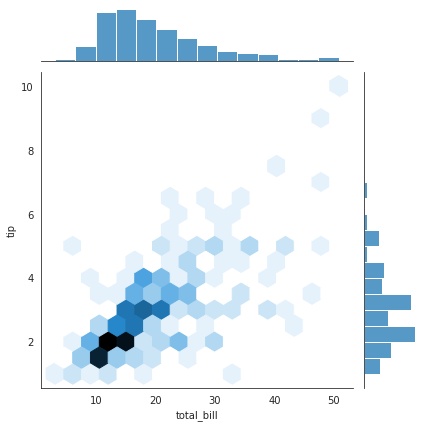

In [45]:
with sns.axes_style('white'):
    sns.jointplot("total_bill", "tip", data=tips, kind="hex")


/Users/jerrychien/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


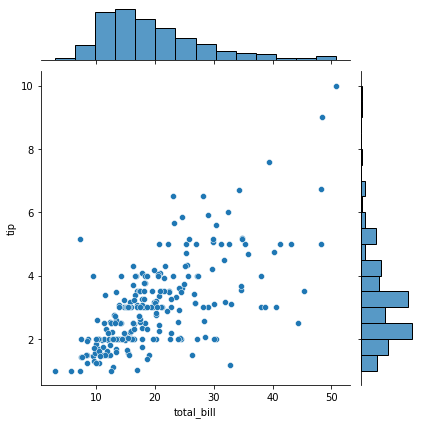

In [46]:
sns.jointplot("total_bill", "tip", data=tips)

In [47]:
planets = sns.load_dataset("planets")
planets.head()

,method,number,orbital_period,mass,distance,year
0,Radial Velocity,1,269.300,7.10,77.40,2006
1,Radial Velocity,1,874.774,2.21,56.95,2008
2,Radial Velocity,1,763.000,2.60,19.84,2011
3,Radial Velocity,1,326.030,19.40,110.62,2007
4,Radial Velocity,1,516.220,10.50,119.47,2009


/Users/jerrychien/opt/anaconda3/lib/python3.9/site-packages/seaborn/categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/Users/jerrychien/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


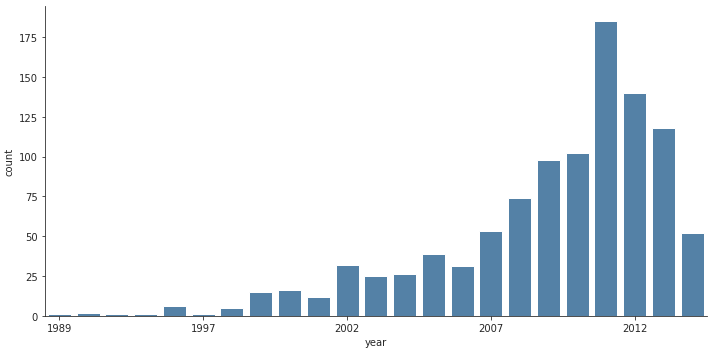

In [48]:
with sns.axes_style(style='ticks'):
    g = sns.factorplot("year", data=planets, aspect = 2,kind="count", color="steelblue")
    g.set_xticklabels(step=5)

## Subplot

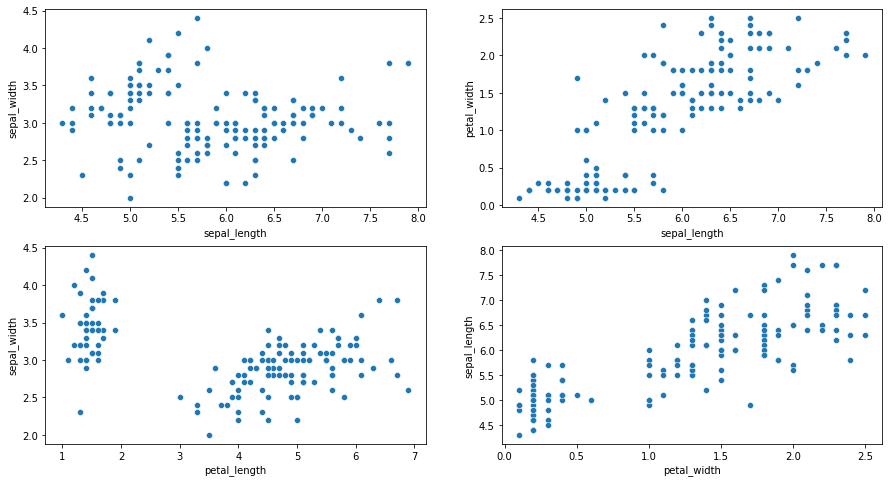

In [49]:
data = px.data.iris()
data.head()
plt.rcParams['figure.figsize'] = (15, 8)

plt.subplot(2, 2, 1)
sns.scatterplot(x=data['sepal_length'], y=data['sepal_width'])   #在 Searn必須要指定出 x,y 參數

plt.subplot(2, 2, 2)
sns.scatterplot(x=data['sepal_length'], y=data['petal_width'])

plt.subplot(2, 2, 3)
sns.scatterplot(x=data['petal_length'], y=data['sepal_width'])

plt.subplot(2, 2, 4)
sns.scatterplot(x=data['petal_width'], y=data['sepal_length'])
plt.show()

In [50]:
tips = sns.load_dataset("tips")
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


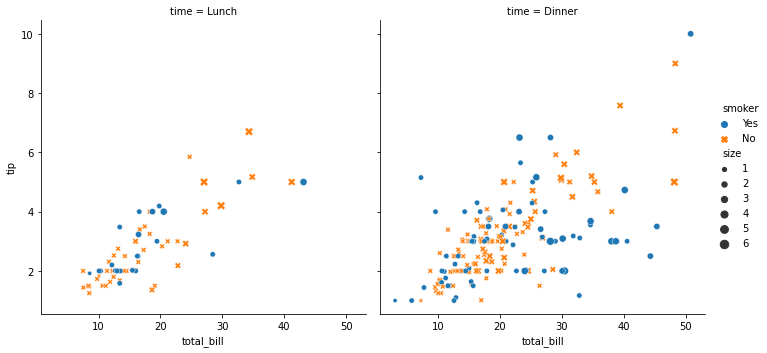

In [51]:
sns.relplot(x="total_bill", y="tip", col="time",hue="smoker", style="smoker", size="size",data=tips);

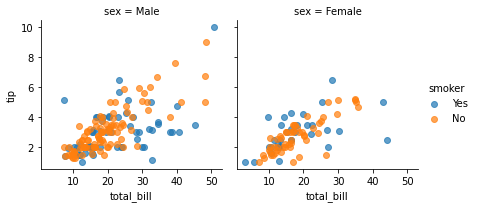

In [52]:
g=sns.FacetGrid(tips,col="sex", hue="smoker")
g.map(plt.scatter, "total_bill", "tip", alpha=.7)
g.add_legend()
plt.show()

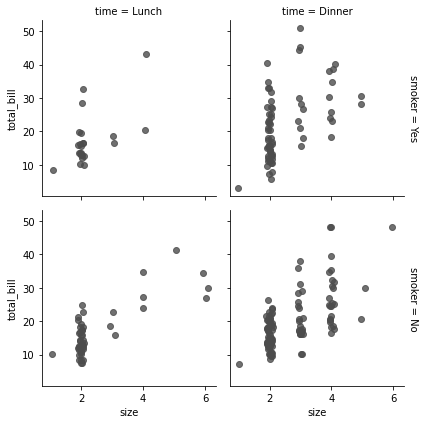

In [53]:
g=sns.FacetGrid(tips,row="smoker", col="time",margin_titles=True)
g.map(sns.regplot, "size", "total_bill", color =".3",fit_reg=False, x_jitter=.1)
plt.show()

## 4. pairplot
Using **seaborn**, we can create a matrix of scatter plots among all columns using the function **sns.pairplot()**: 


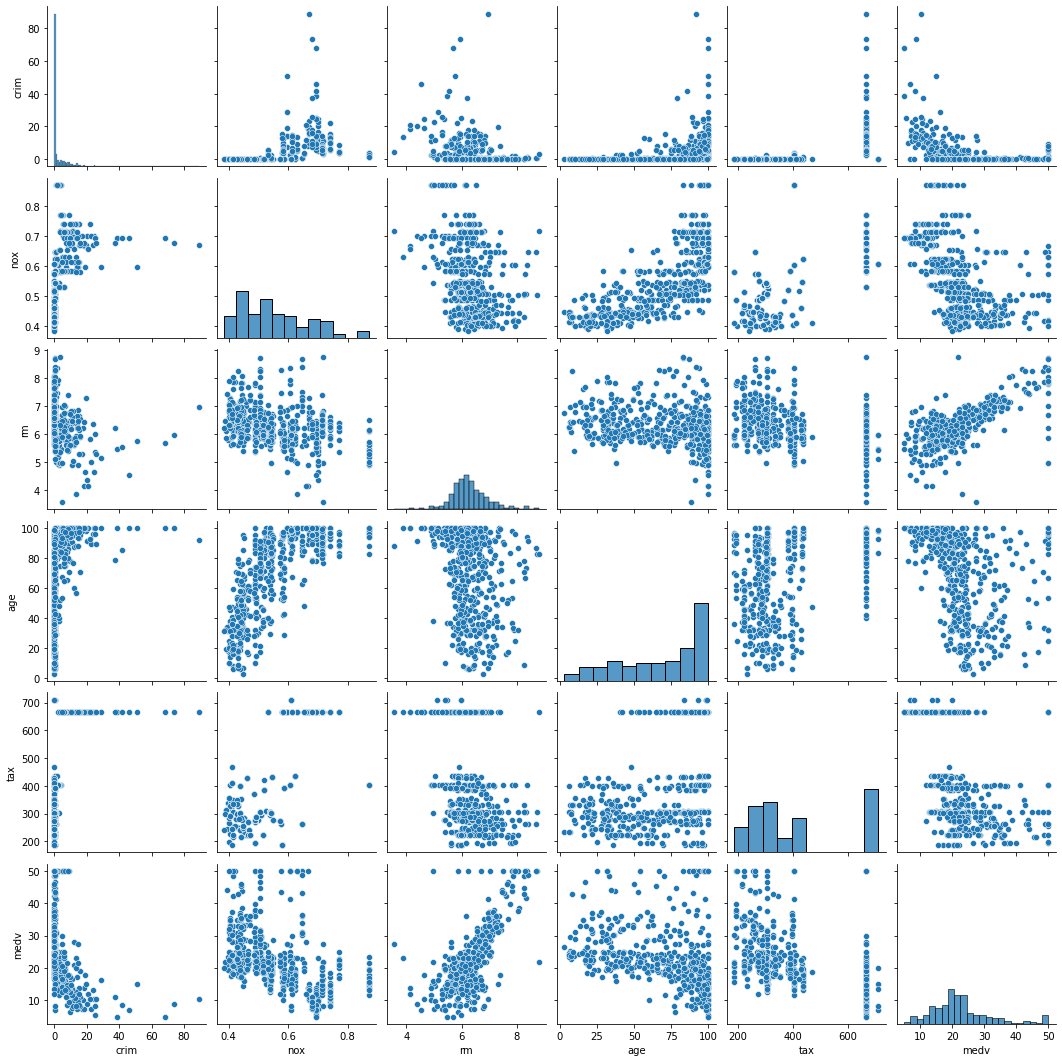

In [54]:
sns.pairplot(boston)
#sns.pairplot(boston, diag_kind = 'kde')